# Isolation forest outlier method trained on barrier and distance variables

In [1]:
import matplotlib.pyplot as plt 
import csv 
import pandas as pd 
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
import seaborn as sns

Read CSV data into panda DataFrame "distance_barrier", print first five rows and plot the data in a scatterplot:

   distance  barrier
0    0.9348     14.8
1    0.9699     12.4
2    0.9983      5.2
3    0.9353     10.5
4    0.9310      9.4


<Axes: xlabel='distance', ylabel='barrier'>

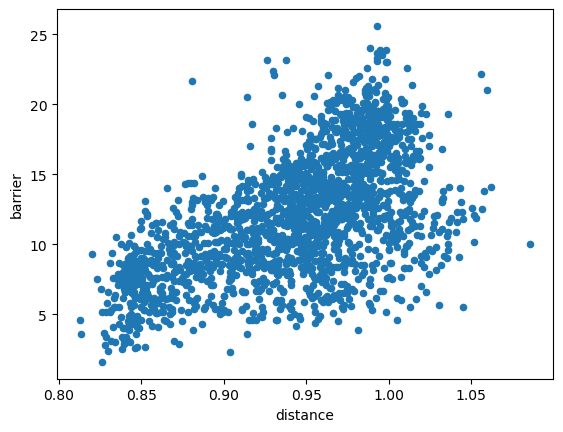

In [2]:
distance_barrier = pd.read_csv("data/vaskas_features_properties_smiles_filenames.csv", usecols=[90, 91])
print(distance_barrier.head())
distance_barrier.plot(kind='scatter', x='distance', y='barrier')
#plt.show()

In [3]:
distance_barrier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1947 entries, 0 to 1946
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   distance  1947 non-null   float64
 1   barrier   1947 non-null   float64
dtypes: float64(2)
memory usage: 30.5 KB


Define variables for the isolation forest model and fit it to the data. Set contamination percentage = percentage of outliers. Define anomaly scores (continuous variable) and anomaly score (descrete variable [1, -1]). 

In [4]:
anomaly_inputs = ['distance', 'barrier']
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.02)
distance_barrier['anomaly'] = lof.fit_predict(distance_barrier[anomaly_inputs])
distance_barrier['anomaly_scores'] = lof.negative_outlier_factor_ * -1

In [5]:
distance_barrier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1947 entries, 0 to 1946
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   distance        1947 non-null   float64
 1   barrier         1947 non-null   float64
 2   anomaly         1947 non-null   int32  
 3   anomaly_scores  1947 non-null   float64
dtypes: float64(3), int32(1)
memory usage: 53.4 KB


In [6]:
distance_barrier.loc[:, ['distance', 'barrier', 'anomaly_scores', 'anomaly'] ]

,distance,barrier,anomaly_scores,anomaly
0,0.9348,14.8,1.005098,1
1,0.9699,12.4,0.985992,1
2,0.9983,5.2,1.122818,1
3,0.9353,10.5,0.990810,1
4,0.9310,9.4,0.999241,1
...,...,...,...,...
1942,0.9435,14.9,1.015506,1
1943,0.9677,13.7,1.014797,1
1944,0.9384,15.6,0.989315,1
1945,0.9674,13.1,0.985789,1


Define a function with Seaborn to plot outliers and inliers in scatterplots, where the anomaly_score is color coded. 

In [7]:
def outlier_plot(data, outlier_method_name, x_var, y_var, c_var, xaxis_limits=[0,1], yaxis_limits=[0,1]):
    
    print(f'Outlier Method: {outlier_method_name} (distance vs barrier)')

    method = f'{outlier_method_name}_anomaly'

    print(f"Number of anomalous values {len(data[data['anomaly']==-1])}")
    print(f"Number of non anomalous values {len(data[data['anomaly']==1])}")
    print(f"Total number of values: {len(data)}")

    g = sns.relplot(data=data, x=x_var, y=y_var, col='anomaly', hue=c_var) 
    g.fig.suptitle(f'Outlier method: {outlier_method_name} (distance vs barrier)', y=1.10, fontweight='bold')
    g.set(xlim=xaxis_limits, ylim=yaxis_limits)
    axes = g.axes.flatten()
    axes[0].set_title(f"Outliers\n{len(data[data['anomaly']== -1])} points")
    axes[1].set_title(f"Inliers\n{len(data[data['anomaly']== 1])} points")
    return g
    
    

Outlier Method: Isolation Forest (distance vs barrier)
Number of anomalous values 39
Number of non anomalous values 1908
Total number of values: 1947


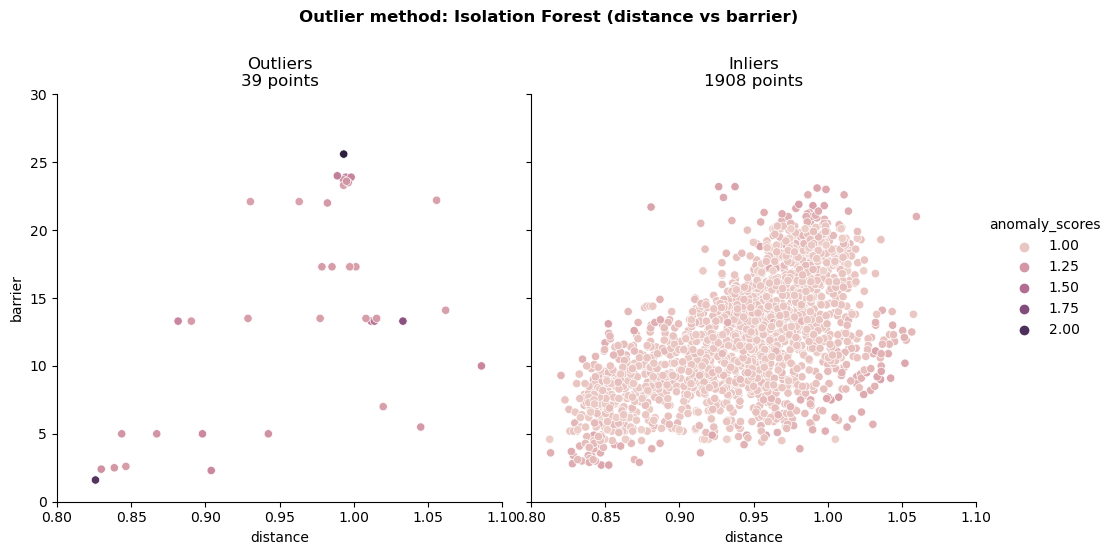

In [8]:
outlier_plot(distance_barrier, "Isolation Forest", "distance", "barrier", "anomaly_scores", [0.8, 1.1], [0, 30])

The Local Outlier Factor model does not seem to perform as well as the isolation forest model on a two dimensional data set with an uniform datadistribution (it picks some outliers from the middle of the dataset). 